In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open("../data/all_reviews.pkl","rb") as f:
    reviews = pickle.load(f)
    
job_filter = pd.read_csv("../data/filter_job_titles.csv")

job_filters = job_filter.clean_job_title.tolist()

idx = reviews.clean_job_title.isin(job_filters)
reviews = reviews.loc[idx,:]

print( reviews.shape )
display( reviews.head() )
reviews.reset_index(drop=True,inplace=True)


(45687, 15)


,company_name,review_title,job_title,employee_status,location,date,review,pros,cons,rating,yes_helpful,no_helpful,industry,clean_job_title,language
299,Fluor Corp.,Awesome company,Quality Manager,Former Employee,Afghanistan,2019-10-17,Fluor is a great company with people that care...,NaN,NaN,4.0,0,0,construction,quality manager,en
1145,Fluor Corp.,Was a much better company in the 90's,Control Systems Designer,Former Employee,"Sugar Land, TX",2018-06-06,Fluor was the first powerhouse EPC that went h...,Nice Location,They have no work,3.0,2,0,construction,control systems designer,en
1375,Fluor Corp.,Enjoyed the Work Environment,Senior Software Developer,Current Employee,"Aliso Viejo, CA",2018-03-08,There is not much that I could add here. I en...,Relaxed Environment,None really,5.0,0,1,construction,software developer,en
1874,Fluor Corp.,Good place,System Engineer I,Current Employee,"Piketon, OH",2017-09-15,The place can be pretty boring most of the tim...,NaN,NaN,4.0,0,0,construction,system engineer,en
2136,Fluor Corp.,Hurry up and wait,Software Developer I,Current Employee,"Piketon, OH",2017-06-26,"Everyone is in a hurry to get things done, but...",Great healthcare,Located in the middle of no-where,3.0,1,0,construction,software developer,en


In [3]:
 reviews.groupby(['industry'])[['job_title']].describe()

job_title                                       
                         count unique                       top  freq
industry                                                             
IT_services              29604   3012         Software Engineer  4552
accounting                 369    194  Senior Software Engineer    20
automotive                1090    338         Software Engineer   136
computer_software         2624    636         Software Engineer   392
construction               228    121                IT Manager    11
education_management       582    244     Network Administrator    35
financial                 5151   1217         Software Engineer   425
higher_ed                  822    316             Web Developer    49
hospital_care             2485    728         Software Engineer   195
retail                    2732    726        Support Specialist   157

In [4]:
len(set(reviews.job_title))

4899

In [5]:
#reviews per industry
reviews.groupby(['industry']).size()

industry
IT_services             29604
accounting                369
automotive               1090
computer_software        2624
construction              228
education_management      582
financial                5151
higher_ed                 822
hospital_care            2485
retail                   2732
dtype: int64

industry
IT_services             [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
accounting              [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
automotive              [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
computer_software       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
construction            [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
education_management    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
financial               [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
higher_ed               [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
hospital_care           [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
retail                  [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

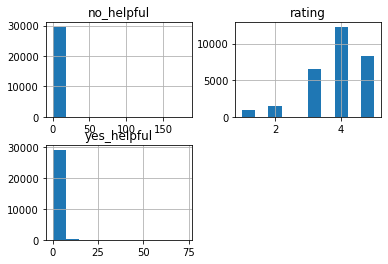

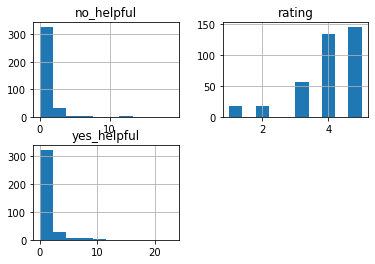

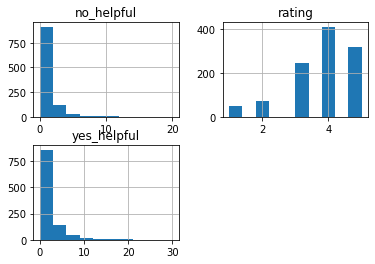

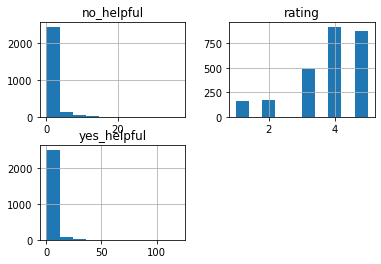

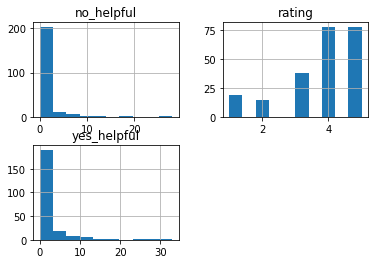

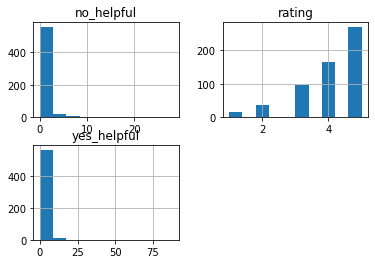

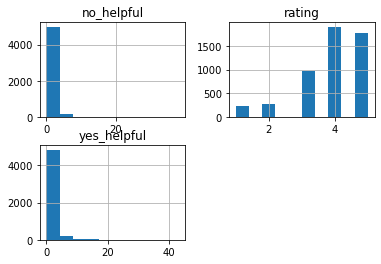

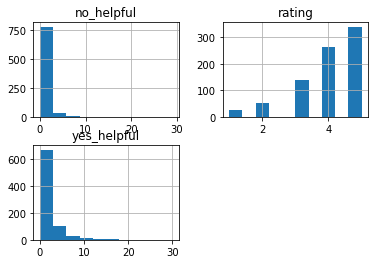

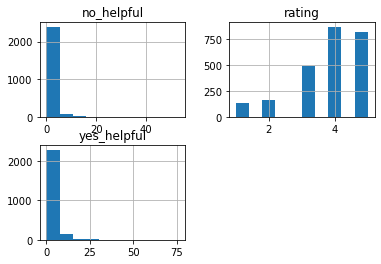

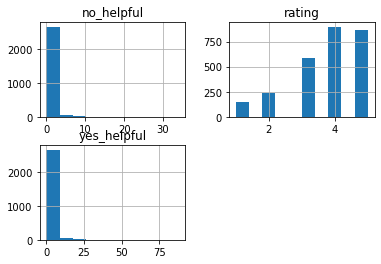

In [11]:
reviews.groupby(['industry']).hist()

In [12]:
# No of reviews for former/current employee status per industry
reviews.groupby(['employee_status','industry']).size()/reviews.groupby(['industry']).size()

employee_status   industry            
Current Employee  IT_services             0.487502
                  accounting              0.460705
                  automotive              0.428440
                  computer_software       0.428735
                  construction            0.377193
                  education_management    0.383162
                  financial               0.422636
                  higher_ed               0.491484
                  hospital_care           0.441851
                  retail                  0.367496
Former Employee   IT_services             0.512498
                  accounting              0.539295
                  automotive              0.571560
                  computer_software       0.571265
                  construction            0.622807
                  education_management    0.616838
                  financial               0.577364
                  higher_ed               0.508516
                  hospital_care           0

In [13]:
reviews.groupby(['industry','language']).size()

industry     language
IT_services  af              3
             cy              3
             da              1
             de             13
             en          29330
                         ...  
retail       cy              1
             en           2719
             es             10
             fr              1
             sv              1
Length: 78, dtype: int64

count    45687.000000
mean        40.425416
std         32.656159
min          1.000000
25%         25.000000
50%         31.000000
75%         43.000000
max        317.000000
Name: review, dtype: float64


Text(0.5, 1.0, 'Review Length Distribution')

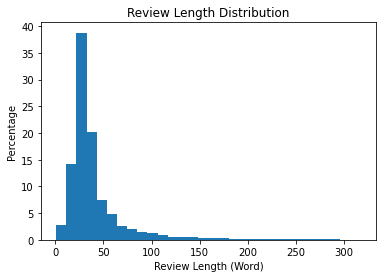

In [14]:

lens = reviews.review.str.split().apply(lambda x: len(x))
print(lens.describe())
plt.hist(lens, weights= 100*(np.ones(len(reviews.review)) / len(reviews.review)), bins = 30)  # `density=False` would make counts
plt.ylabel('Percentage')
plt.xlabel('Review Length (Word)')
plt.title('Review Length Distribution')

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english'))
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
work,41400
good,30133
company,16542
management,13073
great,11880
working,10489
place,10240
job,9685
team,8628
environment,7592


In [16]:
#bi-gram term ferquency
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(reviews.review)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

,0
place work,5270
work life,5121
life balance,4803
good work,3401
work culture,3256
co workers,2743
good place,2700
part job,2610
good company,2566
work environment,2203


In [17]:
from textblob import TextBlob
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
reviews['review'] = preprocess(reviews['review'])
#Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] 
#where 1 means positive sentiment and -1 means a negative sentiment.
reviews['polarity'] = reviews['review'].map(lambda text: TextBlob(text).sentiment.polarity)
#Create new feature for the length of the review
reviews['review_len'] = reviews['review'].astype(str).apply(len)
#Create new feature for the word count of the review
reviews['word_count'] = reviews['review'].apply(lambda x: len(str(x).split()))

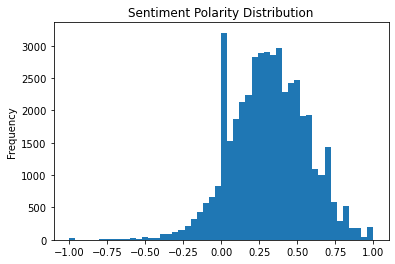

In [18]:
reviews['polarity'].plot(
    kind='hist',
    bins=50,
    title='Sentiment Polarity Distribution')

In [19]:
#polarity average pre industry
reviews.groupby('industry').mean()[['polarity']]

,polarity
industry,
IT_services,0.323882
accounting,0.295025
automotive,0.276034
computer_software,0.305845
construction,0.250278
education_management,0.248174
financial,0.302895
higher_ed,0.298917
hospital_care,0.284905


In [20]:
reviews.groupby('industry').mean()[['rating']]

,rating
industry,
IT_services,3.863701
accounting,4.010840
automotive,3.806422
computer_software,3.832317
construction,3.793860
education_management,4.096220
financial,3.919627
higher_ed,4.025547
hospital_care,3.842254


In [21]:
#review length average per industry
reviews.groupby('industry').mean()[['review_len']]

,review_len
industry,
IT_services,226.117281
accounting,253.040650
automotive,252.341284
computer_software,260.221799
construction,335.723684
education_management,276.101375
financial,250.834595
higher_ed,270.428224
hospital_care,260.637827


In [22]:
#review length average per industry
reviews.groupby('industry').mean()[['word_count']]

,word_count
industry,
IT_services,38.293879
accounting,43.081301
automotive,42.374312
computer_software,44.162729
construction,56.785088
education_management,47.537801
financial,42.032615
higher_ed,46.609489
hospital_care,44.031388


In [23]:
reviews['date'] =  pd.to_datetime(reviews['date'])
reviews.groupby(['industry',reviews.date.dt.year]).mean()[['polarity']]

polarity
industry    date          
IT_services 2011  0.412419
            2012  0.307743
            2013  0.327706
            2014  0.340613
            2015  0.324124
...                    ...
retail      2016  0.296012
            2017  0.275936
            2018  0.242601
            2019  0.241932
            2020  0.238430

[96 rows x 1 columns]

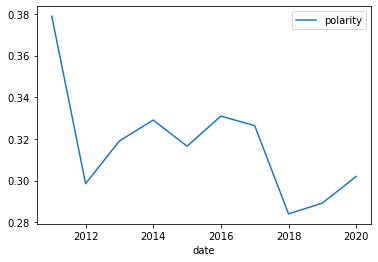

In [24]:
reviews.groupby([reviews.date.dt.year]).mean()[['polarity']].plot()

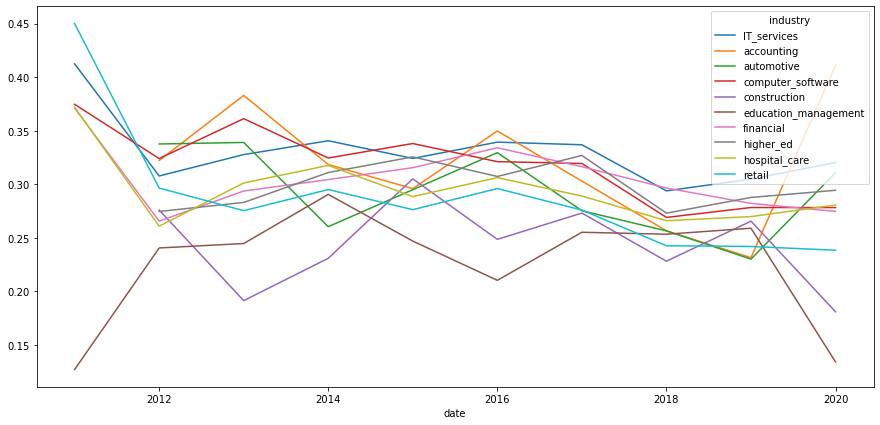

In [25]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews.groupby([reviews.date.dt.year,'industry']).mean()['polarity'].unstack().plot(ax=ax)

In [26]:
reviews.groupby(['industry',reviews.date.dt.year]).mean()[['rating']]

rating
industry    date          
IT_services 2011  4.000000
            2012  3.811475
            2013  3.886930
            2014  3.902069
            2015  3.901988
...                    ...
retail      2016  3.976744
            2017  3.815261
            2018  3.634888
            2019  3.595642
            2020  3.488189

[96 rows x 1 columns]

In [27]:
(reviews.groupby([reviews.date.dt.year]).size()/len(reviews.review))*100

date
2011     0.076608
2012     3.530545
2013     7.481340
2014     9.370280
2015     9.821175
2016    11.130081
2017    24.779478
2018    15.492372
2019    13.815746
2020     4.502375
dtype: float64

In [28]:
reviews.groupby([reviews.date.dt.year,'employee_status']).size()

date  employee_status 
2011  Current Employee       8
      Former Employee       27
2012  Current Employee     739
      Former Employee      874
2013  Current Employee    1740
      Former Employee     1678
2014  Current Employee    2175
      Former Employee     2106
2015  Current Employee    2210
      Former Employee     2277
2016  Current Employee    2564
      Former Employee     2521
2017  Current Employee    5485
      Former Employee     5836
2018  Current Employee    2798
      Former Employee     4280
2019  Current Employee    2558
      Former Employee     3754
2020  Current Employee     909
      Former Employee     1148
dtype: int64

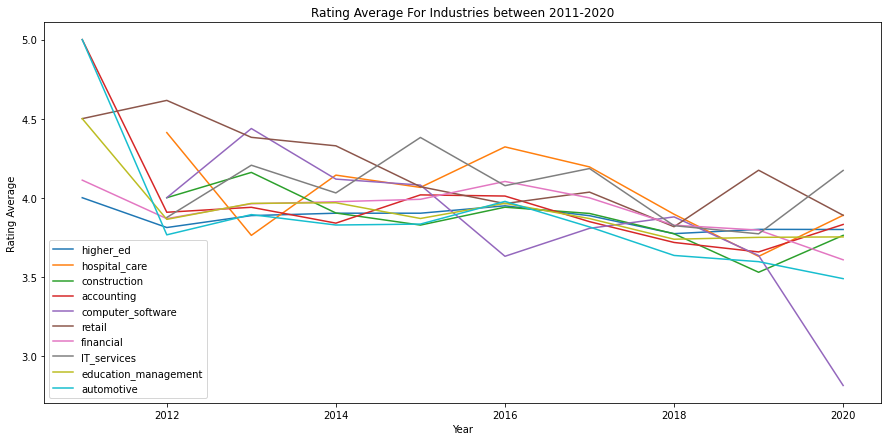

In [54]:
# plot data

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
reviews.groupby([reviews.date.dt.year,'industry']).mean()['rating'].unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Rating Average')
plt.title('Rating Average For Industries between 2011-2020')
ax.legend(set(reviews.industry), loc='lower left')
#ax.grid()
plt.show()

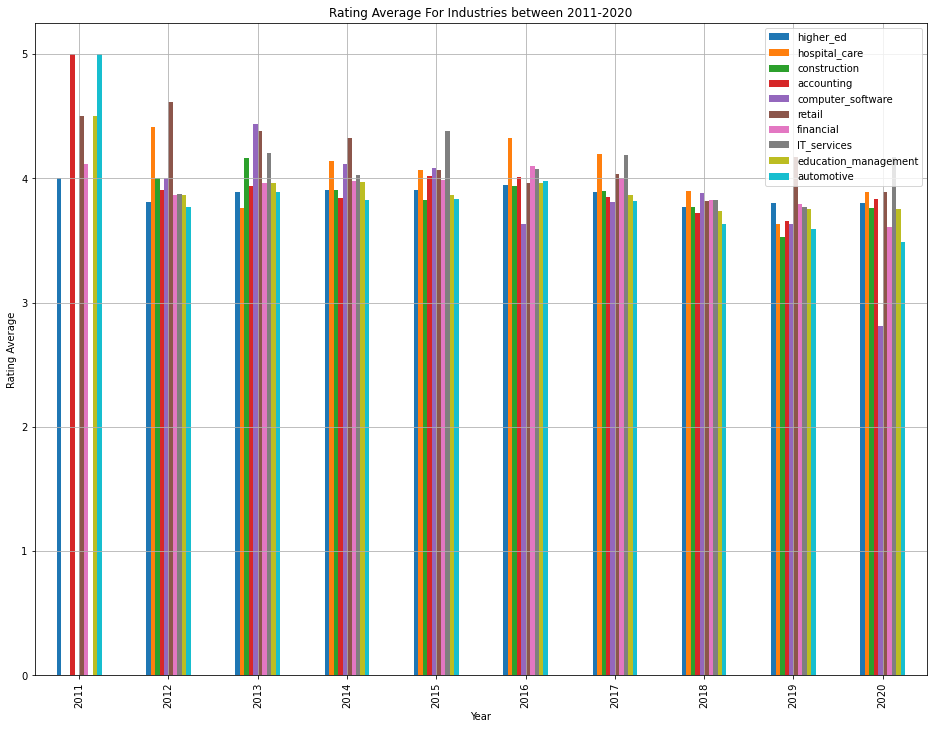

In [47]:
fig, ax = plt.subplots(figsize=(16,12))
reviews.groupby([reviews.date.dt.year,'industry']).mean()['rating'].unstack().plot.bar(ax=ax)
plt.xlabel('Year')
plt.ylabel('Rating Average')
plt.title('Rating Average For Industries between 2011-2020')
ax.legend(set(reviews.industry), loc='upper right')
ax.grid()
plt.show()

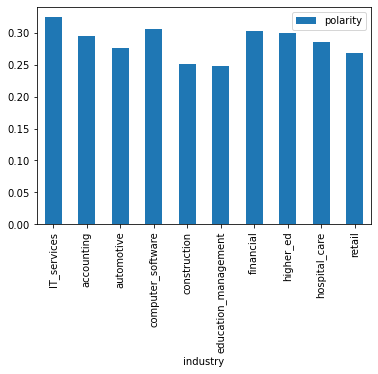

In [25]:
reviews.groupby(['industry']).mean()[['polarity']].plot(kind='bar')

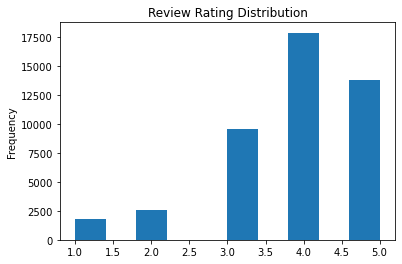

In [26]:
reviews['rating'].plot(
    kind='hist',
    title='Review Rating Distribution')

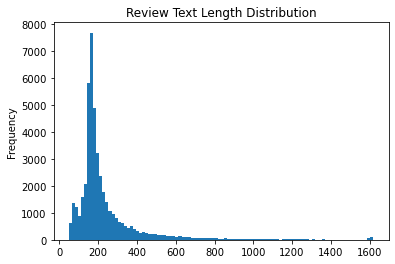

In [27]:
reviews['review_len'].plot(
    kind='hist',
    bins=100,
    title='Review Text Length Distribution')

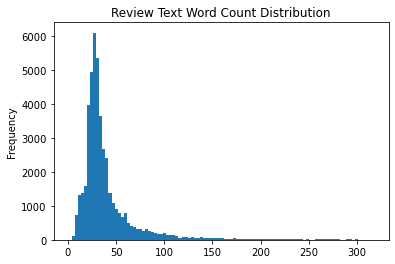

In [28]:
reviews['word_count'].plot(
    kind='hist',
    bins=100,
    title='Review Text Word Count Distribution')

and 67185
the 67152
to 65613
work 41400
is 36687
of 33782
good 30133
in 27848
for 23184
with 22465
you 17529
it 17400
was 17336
company 16542
are 16312
very 14048
management 13073
on 13002
as 12051
my 11902


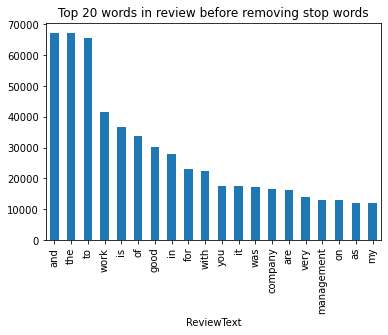

In [29]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df1.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')

work 41400
good 30133
company 16542
management 13073
great 11880
working 10489
place 10240
job 9685
team 8628
environment 7592
people 7203
culture 7071
life 7060
new 6809
lot 6566
learn 6401
time 6250
balance 5551
experience 5094
employees 5054


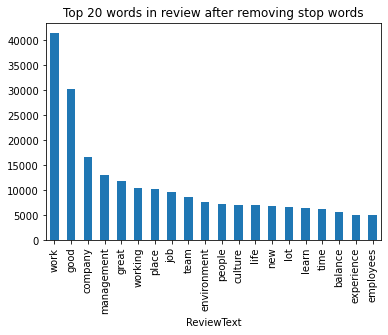

In [30]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')


work 41400
good 30133
company 16542
management 13073
great 11880
working 10489
place 10240
job 9685
team 8628
environment 7592
people 7203
culture 7071
life 7060
new 6809
lot 6566
learn 6401
time 6250
balance 5551
experience 5094
employees 5054
date  ReviewText 
2019  work           41400
2018  good           30133
      company        16542
2017  management     13073
      great          11880
      working        10489
2016  place          10240
2015  job             9685
      team            8628
      environment     7592
      people          7203
2014  culture         7071
      life            7060
2013  new             6809
      lot             6566
      learn           6401
2012  time            6250
2019  balance         5551
      experience      5094
      employees       5054
Name: count, dtype: int64


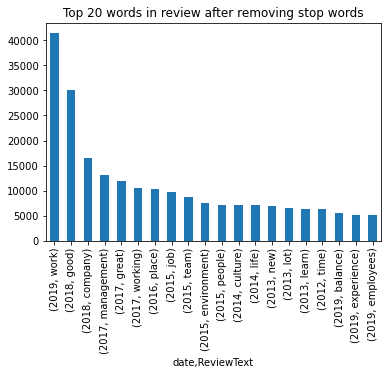

In [31]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby([reviews.date.dt.year,'ReviewText']).sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')
print(df2.groupby([reviews.date.dt.year,'ReviewText']).sum()['count'].sort_values(ascending=False))

to work 14588
of the 7480
place to 7016
work life 4878
life balance 4795
in the 4617
to learn 4241
the company 4218
is good 4083
lot of 3853
part of 3815
work with 3617
very good 3531
work culture 3208
is very 3192
it is 3160
the job 3136
to be 2985
if you 2981
management is 2872


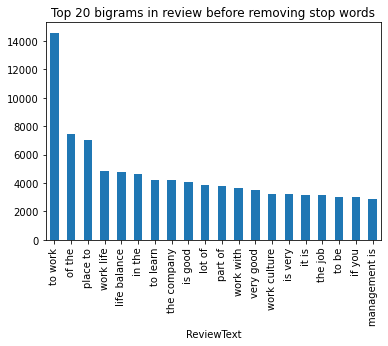

In [32]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df3.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')


place work 5286
work life 5124
life balance 4805
good work 3446
work culture 3259
good place 2701
good company 2587
work environment 2206
company work 2187
great place 2099
learn new 1461
management good 1383
hardest job 1363
new technologies 1344
typical day 1278
job security 1278
culture good 1238
work good 1200
learned lot 1170
good management 1053


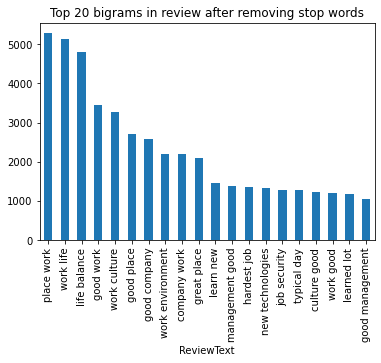

In [33]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews['review'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')
